# Multi otsu threshold 
- https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html

In [92]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_multiotsu
from skimage import io

In [5]:
input_image_path = "../data/raw/Test_images/Sandstone_Versa0250.tif"

In [7]:
image = io.imread(input_image_path, 0)

image_height = image.shape[0]
image_width = image.shape[1]
print(image.shape)

(1024, 996)


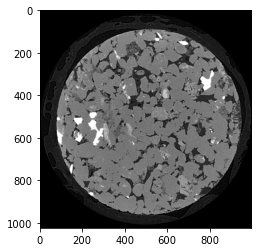

In [9]:
plt.imshow(image, cmap='gray')

### Obtain thresolds

In [91]:
thresholds = threshold_multiotsu(image, 4) # 4 classes for case
print(thresholds)
# thresholds[0] = 35 # user specific threshold value to difference clay and pores
# thresholds

[ 24  83 180]


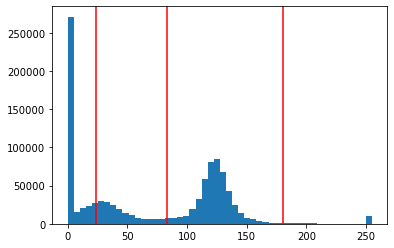

In [73]:
plt.hist(image.reshape(-1), bins=50)

for thresh in thresholds:
    plt.axvline(thresh, color='r')
plt.show()

## Segment based on thresholds

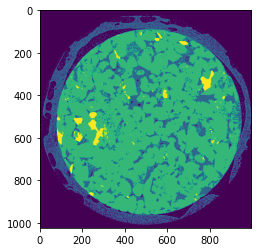

In [74]:
# Using the threshold values, we generate the three regions.

# https://numpy.org/doc/stable/reference/generated/numpy.digitize.html #numpy.digitize
regions = np.digitize(image, bins=thresholds)
plt.imshow(regions)
plt.show()

In [75]:
new_image = np.zeros((image_height, image_width, 3), np.uint8)
new_image.shape

(1024, 996, 3)

In [76]:
pores_index = regions==0
new_image[pores_index] = np.array([0, 0, 255], np.uint8)

clay_index = regions==1
new_image[clay_index] = [0, 255, 0]
                         
quartz_index = regions==2
new_image[quartz_index] = [255, 0, 0]

heavy_index = regions==3
new_image[heavy_index] = [255, 255, 0]

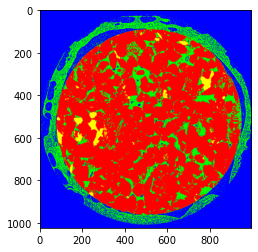

In [77]:
plt.imshow(new_image)

In [78]:
io.imsave("../results/otsu_output_mask.png", new_image)

In [89]:
!make -C .. scores pred_img="./results/otsu_output_mask.png" real_img="./data/raw/Test_masks/Sandstone_Versa0250.tif"
# 29 is pores
# 76 is quartz
# 150 is clay 
# 226 is heavy

make: Entering directory '/home/felladog/Desktop/ML/ML_mini_project'
python ./src/04_segmentation_accuracy.py ./results/otsu_output_mask.png ./data/raw/Test_masks/Sandstone_Versa0250.tif
The IOU Scores of predicted segmented mask:
For label 29, the score is: 0.70
For label 76, the score is: 0.92
For label 150, the score is: 0.11
For label 226, the score is: 0.84

The Dice Scores of predicted segmented mask:
For label 29, the score is: 0.82
For label 76, the score is: 0.96
For label 150, the score is: 0.20
For label 226, the score is: 0.92
make: Leaving directory '/home/felladog/Desktop/ML/ML_mini_project'
